In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from scipy.stats import shapiro, norm, probplot
import scipy as sp

# Phase 1: Simulation of Drilling Costs for Year 0

In [29]:
cost = pd.read_excel('//Users/suyeonkim/Documents/IAA/Spring 1/Simulation and Risk/Homework2_SR/Analysis_Data.xlsx', sheet_name= 'Drilling Cost' , skiprows = 2)
price = pd.read_excel('//Users/suyeonkim/Documents/IAA/Spring 1/Simulation and Risk/Homework2_SR/Analysis_Data.xlsx', sheet_name= 'Price Projections' , skiprows = 2)


In [30]:
cost.columns

Index(['Date',
       'U.S. Nominal Cost per Crude Oil Well Drilled (Thousand Dollars per Well)',
       'U.S. Nominal Cost per Natural Gas Well Drilled (Thousand Dollars per Well)',
       'U.S. Nominal Cost per Dry Well Drilled (Thousand Dollars per Well)',
       'Arithmetic Return - Crude Oil', 'Arithmetic Return - Natural Gas',
       'Arithmetic Return - Dry Well'],
      dtype='object')

In [31]:
price.columns

Index(['Year', 'High Oil Price', 'Low Oil Price', 'AEO2023 Reference'], dtype='object')

In [32]:
# clean the data format

cost['Date'] = pd.to_datetime(cost['Date'])
cost = cost[(cost['Date'] >= "1991-01-01") & (cost['Date'] <= "2006-12-31")]
#cost['Avg Return'] = (cost["Arithmetic Return - Crude Oil"] + cost["Arithmetic Return - Dry Well"] + cost["Arithmetic Return - Natural Gas"])/3
#cost['Avg Return'] = pd.to_numeric(cost['Avg Return'], errors='coerce')

cost['Avg Cost'] = (cost["U.S. Nominal Cost per Crude Oil Well Drilled (Thousand Dollars per Well)"] + cost["U.S. Nominal Cost per Dry Well Drilled (Thousand Dollars per Well)"] + cost["U.S. Nominal Cost per Natural Gas Well Drilled (Thousand Dollars per Well)"])/3
cost['Avg Cost'] = pd.to_numeric(cost['Avg Cost'], errors='coerce')

cost['Arithmetic Return - Crude Oil'] = pd.to_numeric(cost['Arithmetic Return - Crude Oil'], errors='coerce')
cost['Arithmetic Return - Dry Well'] = pd.to_numeric(cost['Arithmetic Return - Dry Well'], errors='coerce')
cost['Arithmetic Return - Natural Gas'] = pd.to_numeric(cost['Arithmetic Return - Natural Gas'], errors='coerce')

In [33]:
cost
# checked it is clean now

,Date,U.S. Nominal Cost per Crude Oil Well Drilled (Thousand Dollars per Well),U.S. Nominal Cost per Natural Gas Well Drilled (Thousand Dollars per Well),U.S. Nominal Cost per Dry Well Drilled (Thousand Dollars per Well),Arithmetic Return - Crude Oil,Arithmetic Return - Natural Gas,Arithmetic Return - Dry Well,Avg Cost
31,1991-06-30,346.9,506.6,441.2,0.077999,0.074899,0.200544,431.566667
32,1992-06-30,362.3,426.1,357.6,0.044393,-0.158902,-0.189483,382.000000
33,1993-06-30,356.6,521.2,387.7,-0.015733,0.223187,0.084172,421.833333
34,1994-06-30,409.5,535.1,491.5,0.148345,0.026669,0.267733,478.700000
35,1995-06-30,415.8,629.7,481.2,0.015385,0.176789,-0.020956,508.900000
36,1996-06-30,341.0,616.0,541.0,-0.179894,-0.021756,0.124273,499.333333
37,1997-06-30,445.6,728.6,655.6,0.306745,0.182792,0.211830,609.933333
38,1998-06-30,566.0,815.6,973.2,0.270197,0.119407,0.484442,784.933333
39,1999-06-30,783.0,798.4,1115.5,0.383392,-0.021089,0.146219,898.966667
40,2000-06-30,593.4,756.9,1075.4,-0.242146,-0.051979,-0.035948,808.566667


### Check normality

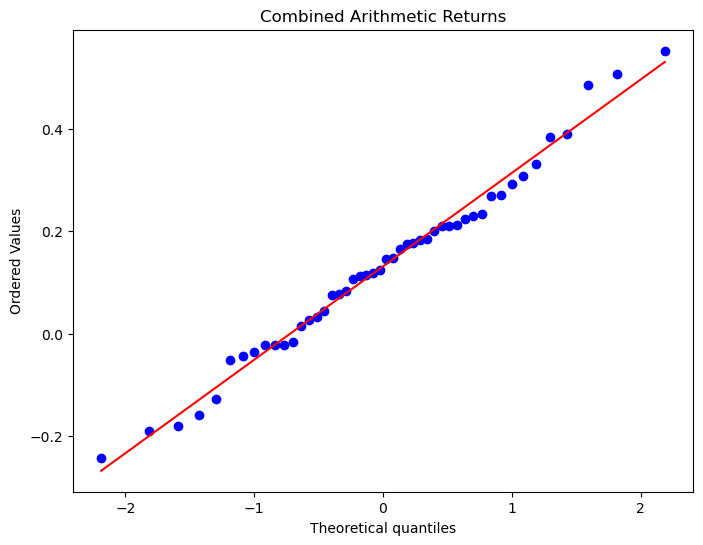

In [34]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

arithmetic_changes = cost[["Arithmetic Return - Natural Gas", "Arithmetic Return - Dry Well", "Arithmetic Return - Crude Oil"]].values

all_data = arithmetic_changes.flatten()

#QQplot
fig, ax = plt.subplots(figsize=(8, 6))
stats.probplot(all_data, dist="norm", plot=ax)
ax.set_title('Combined Arithmetic Returns')

plt.show()


### It looks normal, so we proceed with the simulation with normal distribution

## Simulation with Normal Distribution

In [35]:
#check the changes
arithmetic_changes= cost[["Arithmetic Return - Natural Gas", "Arithmetic Return - Dry Well", "Arithmetic Return - Crude Oil"]].values.tolist()
arithmetic_changes = np.array(arithmetic_changes)
flat_arithmetic_changes = [item for sublist in arithmetic_changes for item in sublist]

In [36]:
#check the mean
np.mean(flat_arithmetic_changes)

0.13149126581580003

In [37]:
#check the standard deviation
np.std(flat_arithmetic_changes)

0.17656869616614107

In [38]:
#start the simulation with the values above

np.random.seed(112358)

data = []
arithmetic_changes= cost[["Arithmetic Return - Natural Gas", "Arithmetic Return - Dry Well", "Arithmetic Return - Crude Oil"]].values.tolist()
arithmetic_changes = np.array(arithmetic_changes)
flat_arithmetic_changes = [item for sublist in arithmetic_changes for item in sublist]
P0 = 2279800


data = []
for i in range(1000000):

   
    Pt = P0
  
    # normal dist for 2007-2012
    for j in range(6):
        ret = np.random.normal(loc = 0.131, scale = 0.178)
        Pt = Pt * (1 + ret)
    # triangular dist for 2012-2015
    for j in range(3):
        ret = np.random.triangular(left = -0.22, mode = -0.0917, right = -0.07)
        Pt = Pt * (1 + ret)
    # triangular dist for 2015-2025
    for j in range(10):
        ret = np.random.triangular(left = 0.02, mode = 0.05, right = 0.06)
        Pt = Pt * (1 + ret)
        
    data.append(Pt)
  

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


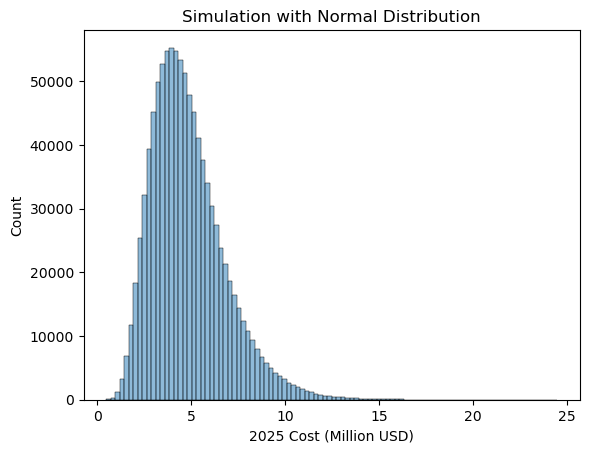

In [39]:
#plot the historgram

df = pd.DataFrame(data)

#histogram
ax = sns.histplot(data=df / 1e6, bins=100)

ax.set_xlabel("2025 Cost (Million USD)")
ax.set_title("Simulation with Normal Distribution")

#remove legend
if ax.legend_:
    ax.legend_.remove()

plt.show()

In [40]:
year0cost = df.to_numpy()
year0cost = year0cost.flatten()

# Phase 2.1: Begin Simulation of Year 0 Cost for a Single Dry Well (Incorporating Additional Drilling Costs)

In [41]:
simulation_size = 1000000

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


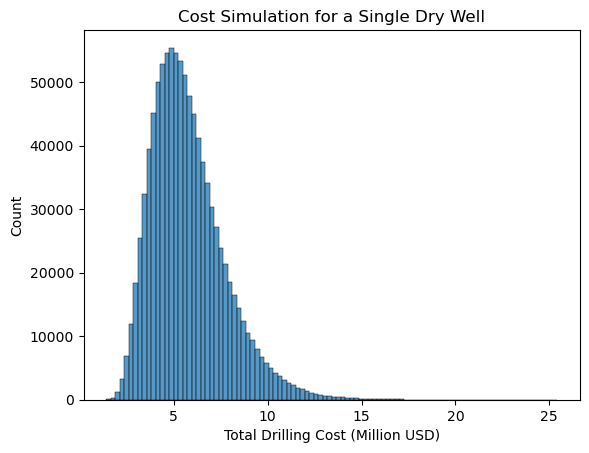

In [42]:
# Seismic and lease costs
leased_acres_per_well = np.random.normal(600, 50, simulation_size)
seismic_sections_per_well = np.random.normal(3, 0.35, simulation_size)

price_per_acre = 960
seismic_cost_per_section = 43000

lease_costs = leased_acres_per_well * price_per_acre
seismic_costs = seismic_sections_per_well * seismic_cost_per_section


# Professional overhead
prof_overhead_costs = np.random.triangular(left=172000, mode=215000, right=279500, size= simulation_size)

# Cost of single dry well
total_dry_drilling_costs = year0cost + lease_costs + seismic_costs + prof_overhead_costs
total_dry_drilling_costs = total_dry_drilling_costs.flatten()

# Plot Distribution
ax = sns.histplot(data=total_dry_drilling_costs/1e6, bins=100)
ax.set(xlabel="Total Drilling Cost (Million USD)")
ax.set_title('Cost Simulation for a Single Dry Well')
plt.show()


In [43]:
# calculate the median
median_dry_drilling_cost = np.median(total_dry_drilling_costs)
print("Median Dry Drilling Cost:", median_dry_drilling_cost)

Median Dry Drilling Cost: 5466139.977657983


# Phase 2.2 : Begin Simulation of NPV of Wet Well

In [44]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import scipy.linalg as sp
import seaborn as sns
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(112358)

# Simulation settings
simSize = 1000000
num_years = 15

# Seismic & Lease Costs
leased_acres_per_well = np.random.normal(600, 50, simSize)
seismic_sections_per_well = np.random.normal(3, 0.35, simSize)

price_per_acre = 960
seismic_cost_per_section = 43000

lease_costs = leased_acres_per_well * price_per_acre
seismic_costs = seismic_sections_per_well * seismic_cost_per_section

# Completion & Overhead Costs
completion = np.random.normal(390000, 50000, simSize)
overhead = np.random.triangular(172000, 215000, 279500, simSize)


# Lognormal to Normal Conversion for Initial Production (IP)
log_avg = 420
log_std = 120
sigma_normal = np.sqrt(np.log(1 + (log_std / log_avg) ** 2))
mean_normal = np.log(log_avg) - sigma_normal**2 / 2

# Initial Production (IP) & Decline Rate
IP = np.random.lognormal(mean=6, sigma=0.28, size=simSize)
decline = np.random.uniform(0.15, 0.32, size=simSize)

# Apply Correlation between IP and Decline Rate
R = np.array([[1, 0.64], [0.64, 1]])
U = sp.cholesky(R, lower=False)

def standardize(x):
    return (x - np.mean(x)) / np.std(x)

def destandardize(x_std, x_original):
    return x_std * np.std(x_original) + np.mean(x_original)

both_vars = np.array([standardize(IP), standardize(decline)])
correlated_vars = U @ both_vars
final_rate = np.array([destandardize(correlated_vars[0], IP), destandardize(correlated_vars[1], decline)])

# Revenue Interest
interest = np.random.normal(0.75, 0.02, size=simSize)

# Initialize NPV Calculation
yearBegin = np.array(final_rate[0])
npv = -(total_dry_drilling_costs + completion)



NPV Min/Max:  -13240129.298689038 107255869.25951815


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


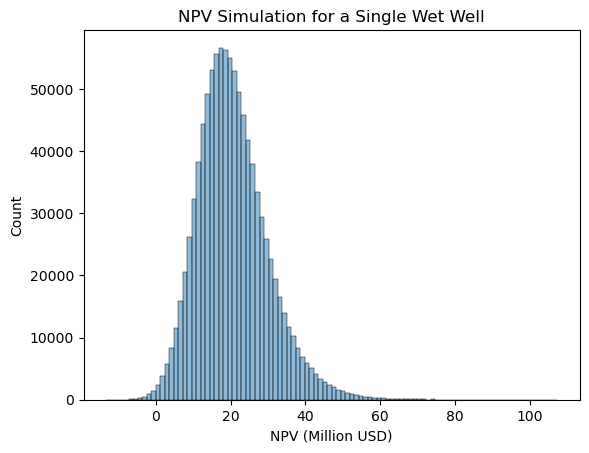

In [45]:
price['Year'] = price['Year'].astype(int)

for i in range(15):
    yearEnd = yearBegin * (1 - final_rate[1])
    
    production = 365 * (yearBegin + yearEnd) / 2
    
    year_filter = price.loc[price['Year'] == (2026 + i)]
    if not year_filter.empty:
        low = year_filter.iloc[0]['Low Oil Price']
        high = year_filter.iloc[0]['High Oil Price']
        exp = year_filter.iloc[0]['AEO2023 Reference']
    else:
        print(f"Warning: Year {2026 + i} not found in price data")
        continue
    
    #oil price
    price_sim = np.random.triangular(low, exp, high, size=simSize)
    
    # Net Revenue & Severance Tax 
    revenue = production * price_sim * interest * (1 - 0.046)

    # operation cost
    operate = np.full(simSize, np.random.normal(loc=2.25, scale=0.3), dtype=float) 
    
    # npv
    npv += (revenue - operate - overhead) / (1.1 ** (i + 1))
        
    # update
    yearBegin = np.array(yearEnd).reshape(-1)  # reshape

# final NPV range
print("NPV Min/Max: ", np.min(npv), np.max(npv))

# histogram
ax = sns.histplot(data=pd.DataFrame(npv)/1e6, bins=100, legend=False)
ax.set(xlabel="NPV (Million USD)", title="NPV Simulation for a Single Wet Well")
plt.show()


In [46]:
# check median
print(np.median(npv))

19656657.336328156


In [47]:
import numpy as np
from scipy.stats import truncnorm, bernoulli


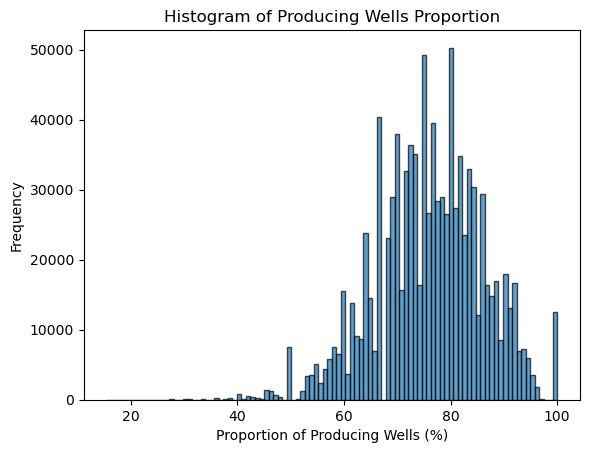

5% VaR: 0.5882352941176471
5% CVaR: 0.5345763453910476


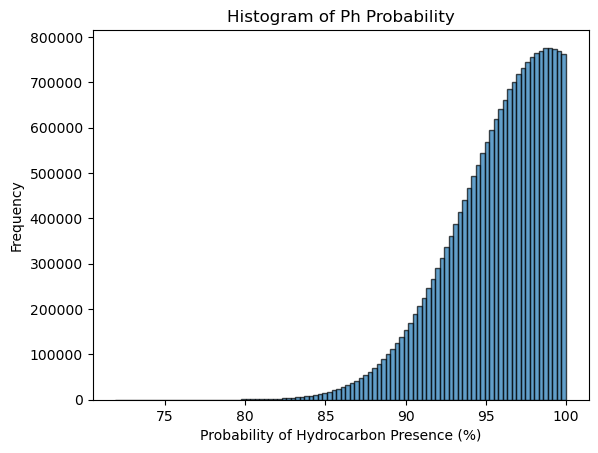

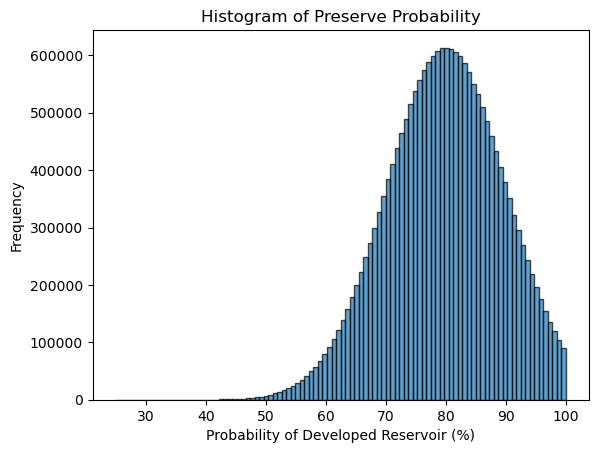

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm, bernoulli

n_simulation = 1000000 

#Planned number of wells (each simulation has 10 to 30 wells)
n_wells = np.random.randint(10, 31, size=n_simulation)

# Function to sample from a truncated normal distribution
def get_truncated_normal(mean, sd, low, upp, size):
    a, b = (low - mean) / sd, (upp - mean) / sd
    return truncnorm.rvs(a, b, loc=mean, scale=sd, size=size)

# Calculate the total number of wells required across all simulations
total_wells = np.sum(n_wells)

# Sample Ph and Preserve probabilities at once
ph_probs = get_truncated_normal(mean=0.99, sd=0.05, low=0, upp=1, size=total_wells)
preserv_probs = get_truncated_normal(mean=0.8, sd=0.1, low=0, upp=1, size=total_wells)

# Probability calculations and Bernoulli trials
producing_probs = ph_probs * preserv_probs
outcomes = bernoulli.rvs(producing_probs)

# Group results according to the number of wells in each simulation
split_indices = np.cumsum(n_wells[:-1])  # Compute group indices
results = np.split(outcomes, split_indices)

# Calculate the proportion of producing wells in each simulation
proportions = np.array([np.mean(sim) for sim in results])

# Histogram of the proportion of producing wells distribution
plt.hist(proportions*100, bins=100, alpha=0.7, edgecolor='black')
plt.xlabel('Proportion of Producing Wells (%)')
plt.ylabel('Frequency')
plt.title('Histogram of Producing Wells Proportion')
plt.show()

# Calculate the 5% Value at Risk (VaR)
VaR_5 = np.percentile(proportions, 5)

# Calculate the 5% Conditional Value at Risk (CVaR)
CVaR_5 = proportions[proportions <= VaR_5].mean()

print("5% VaR:", VaR_5)
print("5% CVaR:", CVaR_5)

# Histogram for Ph probability distribution
plt.hist(ph_probs*100, bins=100, alpha=0.7, edgecolor='black')
plt.xlabel('Probability of Hydrocarbon Presence (%)')
plt.ylabel('Frequency')
plt.title('Histogram of Ph Probability')
plt.show()

# Histogram for Preserv probability distribution
plt.hist(preserv_probs*100, bins=100, alpha=0.7, edgecolor='black')
plt.xlabel('Probability of Developed Reservoir (%)')
plt.ylabel('Frequency')
plt.title('Histogram of Preserve Probability')
plt.show()



In [49]:
#Median
print(np.median(proportions))
print(np.median(ph_probs))
print(np.median(preserv_probs))

0.7647058823529411
0.9622731061063186
0.7971481724776224


Total Project NPV Min/Max: -48854776.59557487 745018977.7699271
5% VaR: 112440459.80519882
5% CVaR: 86396563.97185364


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


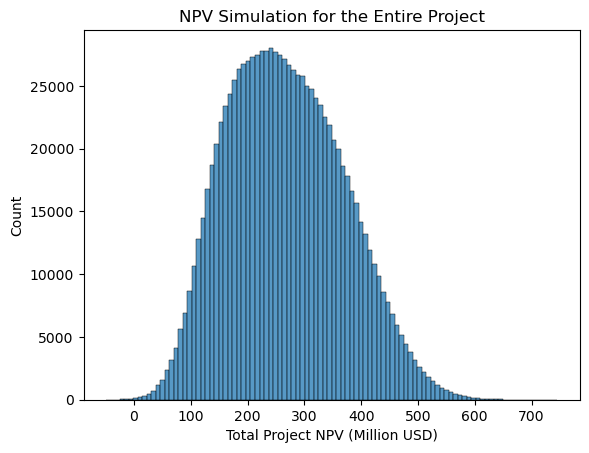

In [50]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import scipy.linalg as sp
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import truncnorm, bernoulli

# Set seed for reproducibility
np.random.seed(112358)

# Simulation settings
n_simulation = 1000000
num_years = 15

# Define truncated normal distribution function
def get_truncated_normal(mean, sd, low, upp, size):
    a, b = (low - mean) / sd, (upp - mean) / sd
    return truncnorm.rvs(a, b, loc=mean, scale=sd, size=size)

# Generate number of wells per simulation
n_wells = np.random.randint(10, 31, size=n_simulation)
total_wells = np.sum(n_wells)

# Sample probabilities for well outcomes
ph_probs = get_truncated_normal(mean=0.99, sd=0.05, low=0, upp=1, size=total_wells)
preserv_probs = get_truncated_normal(mean=0.8, sd=0.1, low=0, upp=1, size=total_wells)
producing_probs = ph_probs * preserv_probs
outcomes = bernoulli.rvs(producing_probs)

# Split outcomes into dry and producing wells
split_indices = np.cumsum(n_wells[:-1])
results = np.split(outcomes, split_indices)
producing_counts = np.array([np.sum(sim) for sim in results])
dry_counts = n_wells - producing_counts

# Seismic & Lease Costs
leased_acres_per_well = np.random.normal(600, 50, total_wells)
seismic_sections_per_well = np.random.normal(3, 0.35, total_wells)
price_per_acre = 960
seismic_cost_per_section = 43000
lease_costs = leased_acres_per_well * price_per_acre
seismic_costs = seismic_sections_per_well * seismic_cost_per_section

# Completion & Overhead Costs
completion = np.random.normal(390000, 50000, total_wells)
overhead = np.random.triangular(172000, 215000, 279500, total_wells)

# Year0Cost
np.random.seed(112358)

data = []
P0 = 2279800

for i in range(total_wells):
    Pt = P0
  
    # normal dist for 2006-2012
    for j in range(7):
        ret = np.random.normal(loc=0.131, scale=0.178)
        Pt = Pt * (1 + ret)

    # triangular dist for 2012-2015
    for j in range(3):
        ret = np.random.triangular(left=-0.22, mode=-0.0917, right=-0.07)
        Pt = Pt * (1 + ret)

    # triangular dist for 2015-2026
    for j in range(11):
        ret = np.random.triangular(left=0.02, mode=0.05, right=0.06)
        Pt = Pt * (1 + ret)
        
    data.append(Pt)
   
df = pd.DataFrame(data)
year0cost = df.to_numpy().flatten()


total_dry_drilling_costs = year0cost + lease_costs + seismic_costs + overhead

# Initial Production (IP) & Decline Rate
IP = np.random.lognormal(mean=6, sigma=0.28, size=total_wells)
decline = np.random.uniform(0.15, 0.32, size=total_wells)

# Apply Correlation between IP and Decline Rate
R = np.array([[1, 0.64], [0.64, 1]])
U = sp.cholesky(R, lower=False)

def standardize(x):
    return (x - np.mean(x)) / np.std(x)

def destandardize(x_std, x_original):
    return x_std * np.std(x_original) + np.mean(x_original)

both_vars = np.array([standardize(IP), standardize(decline)])
correlated_vars = U @ both_vars
final_rate = np.array([destandardize(correlated_vars[0], IP), destandardize(correlated_vars[1], decline)])

# Revenue Interest
interest = np.random.normal(0.75, 0.02, size=total_wells)

# Assuming 'price' dataframe exists with 'Year', 'Low Oil Price', 'High Oil Price', 'AEO2023 Reference'
price['Year'] = price['Year'].astype(int)

price_matrix = []
for i in range(num_years):
    year_filter = price.loc[price['Year'] == (2026 + i)]
    if not year_filter.empty:
        low = year_filter.iloc[0]['Low Oil Price']
        high = year_filter.iloc[0]['High Oil Price']
        exp = year_filter.iloc[0]['AEO2023 Reference']
        price_sim = np.random.triangular(low, exp, high, size=total_wells)
        price_matrix.append(price_sim)
    else:
        print(f"Warning: Year {2026 + i} not found in price data")
        continue

price_matrix = np.array(price_matrix).T

# Production Matrix Calculation
production_matrix = np.zeros((total_wells, num_years))
production_matrix[:, 0] = final_rate[0]

for i in range(1, num_years):
    production_matrix[:, i] = production_matrix[:, i-1] * (1 - final_rate[1])

average_production = 365 * (production_matrix[:, :-1] + production_matrix[:, 1:]) / 2
average_production = np.hstack([average_production, production_matrix[:, -1].reshape(-1, 1)])

revenue_matrix = average_production * price_matrix * interest[:, np.newaxis] * (1 - 0.046)

operate = np.random.normal(loc=2.25, scale=0.3, size=(total_wells, num_years))
discount_factors = 1 / (1.1 ** np.arange(1, num_years + 1))

npv = -(total_dry_drilling_costs + completion)
npv += np.sum((revenue_matrix - operate - overhead[:, np.newaxis]) * discount_factors, axis=1)

# Aggregate project-level NPV
total_wet_npv = np.array([np.sum(npv[np.sum(n_wells[:i]):np.sum(n_wells[:i+1])][outcomes[np.sum(n_wells[:i]):np.sum(n_wells[:i+1])] == 1]) for i in range(n_simulation)])
total_dry_costs = np.array([np.sum(total_dry_drilling_costs[np.sum(n_wells[:i]):np.sum(n_wells[:i+1])][outcomes[np.sum(n_wells[:i]):np.sum(n_wells[:i+1])] == 0]) for i in range(n_simulation)])

total_project_npv = total_wet_npv - total_dry_costs

# Calculate risk measures
VaR_5 = np.percentile(total_project_npv, 5)
CVaR_5 = total_project_npv[total_project_npv <= VaR_5].mean()

print("Total Project NPV Min/Max:", np.min(total_project_npv), np.max(total_project_npv))
print("5% VaR:", VaR_5)
print("5% CVaR:", CVaR_5)

# Histogram for project NPV
ax = sns.histplot(data=pd.Series(total_project_npv) / 1e6, bins=100, legend=False)
ax.set(xlabel="Total Project NPV (Million USD)", title="NPV Simulation for the Entire Project")
plt.show()


In [53]:
print(np.median(total_project_npv))

261276441.49552763


In [54]:
from scipy import stats
import numpy as np 
stats.percentileofscore(total_project_npv, 0)

0.0115